In [2]:
# QUESTION

# A. Read the grid cell data set
# B. Read a travel time data set,
# discard unnecessary columns,
# rename the relevant columns to include a reference to the respective shopping centre,
# join the relevant columns to the grid data set
# C. Classify the travel times for both travel modes (public transport and private car) into five-minute intervals

In [3]:
import geopandas as gpd
import pandas as pd

In [4]:
# This work aims to visualise the travel times to two shopping centres (Itis and Myrramanni) from every other
# place in the Helsinki metropolitan area.

In [5]:
grid = gpd.read_file(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\YKR_grid_EPSG3067.GPKG')  #loads the data set of the Helsinki districts

grid

,YKR_ID,geometry
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."
...,...,...
13226,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6..."
13227,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6..."
13228,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6..."
13229,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6..."


<Axes: >

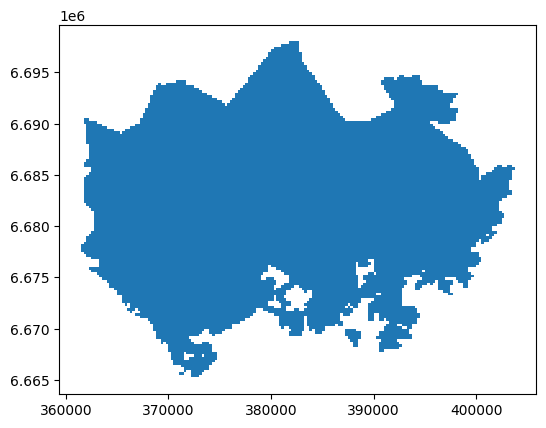

In [6]:
grid.plot()

In [7]:
grid.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
# reads the non-spatial data of the Itis, a shopping centre

itis = pd.read_csv(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\travel_times_to_Itis.txt', sep= ';')
itis

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,6016698,5944003,476,33313,60,41485,52,41970,79,98,34922,82,103,34025
13227,6016699,5944003,478,33440,62,41173,54,41658,81,98,35050,84,103,34152
13228,6018252,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13229,6018253,5944003,481,33670,61,41662,53,42147,84,98,35279,87,103,34382


In [9]:
# selecting important columns

itis = itis[['from_id', 'to_id','pt_r_t', 'car_r_t']]
itis

,from_id,to_id,pt_r_t,car_r_t
0,5785640,5944003,132,50
1,5785641,5944003,135,51
2,5785642,5944003,137,58
3,5785643,5944003,141,57
4,5787544,5944003,125,50
...,...,...,...,...
13226,6016698,5944003,79,60
13227,6016699,5944003,81,62
13228,6018252,-1,-1,-1
13229,6018253,5944003,84,61


In [10]:
# joining the shopping centre data to the the grid data of the Helsinki region

# to join a non-spatial df to a spatial df, merge is used and a common column/attriute data is required for compatibility which is the IDS

# since the non-spatial df has two columns, each columns have to be joined separately


In [11]:
# joining the spatial df to the nin-spatial df

merged = grid.merge(itis, left_on = 'YKR_ID', right_on='from_id')

merged.head()

,YKR_ID,geometry,from_id,to_id,pt_r_t,car_r_t
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5944003,132,50
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5944003,135,51
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5944003,137,58
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",5785643,5944003,141,57
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",5787544,5944003,125,50


In [12]:
# time for classification and visualization
# classifying the travel times from the shopping centre to other plces in the Helsinki district with a 5 miutes interval grouping 

In [13]:
# first we create a classifier and then apply it to the pt and car columns of the df. After, create or rewrite a new column.
#  We use the user defined classifier since its best for allocating class breaks


# we import mapclassify
import mapclassify       

#creating a classifier with an interval of 5 minutes. With this type of classification, it is best to use User Defined of the pysal lib 
intervals = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] 

classify = mapclassify.UserDefined.make(bins = intervals) 



In [14]:
# Applying the classifier to pt_r_t_[ShoppingCentre] and car_r_t_[ShoppingCentre] columns, and store the results to pt_r_t_cl_[ShoppingCentre] 
# and car_r_t_cl_[ShoppingCentre] columns, respectively

In [15]:
# classifying the public transport travel time
merged['pt_r_t_cl'] = classify(merged['pt_r_t'])

In [16]:
# reading the dataframe to see if it has been applied
merged[['pt_r_t_cl', 'pt_r_t']].head()

,pt_r_t_cl,pt_r_t
0,12,132
1,12,135
2,12,137
3,12,141
4,12,125


In [17]:
# classifying the car transport travel time
merged['car_r_t_cl'] = classify(merged['car_r_t'])

merged[['car_r_t_cl', 'car_r_t']].head()


,car_r_t_cl,car_r_t
0,9,50
1,10,51
2,11,58
3,11,57
4,9,50


In [18]:
# checking the whole df for the new columns
merged

,YKR_ID,geometry,from_id,to_id,pt_r_t,car_r_t,pt_r_t_cl,car_r_t_cl
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5944003,132,50,12,9
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5944003,135,51,12,10
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5944003,137,58,12,11
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",5785643,5944003,141,57,12,11
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",5787544,5944003,125,50,12,9
...,...,...,...,...,...,...,...,...
13226,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",6016698,5944003,79,60,12,11
13227,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",6016699,5944003,81,62,12,12
13228,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6...",6018252,-1,-1,-1,0,0
13229,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",6018253,5944003,84,61,12,12


In [19]:
from matplotlib import pyplot as plt

<Axes: title={'center': 'Itis travel time via public transport'}>

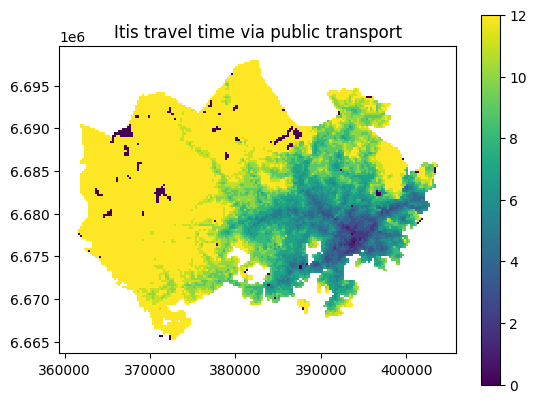

In [20]:
# a classified plot showing the travel time accessibility of itis shopping centre via public transport in the Helsinki district
public_transport = merged.plot(column = 'pt_r_t_cl', legend = True )
plt.title('Itis travel time via public transport')
public_transport

<Axes: title={'center': 'Itis travel time via car transport'}>

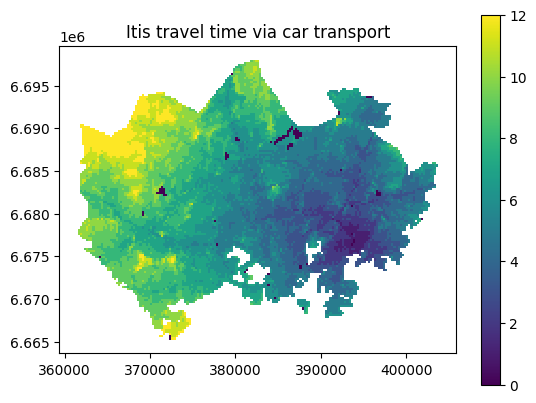

In [21]:
# a classified plot showing the travel time accessibility of itis shopping centre via car(private)transport in the Helsinki district
car_transport = merged.plot(column = 'car_r_t_cl', legend = True )
plt.title('Itis travel time via car transport')
car_transport

In [22]:
# pytting both plots o the same graph

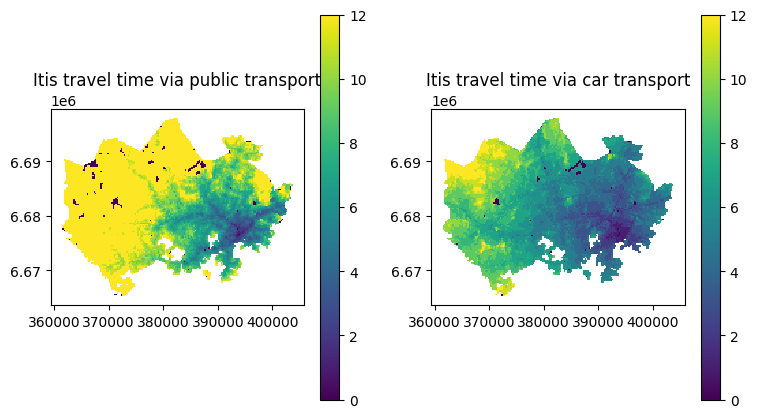

In [26]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize =(10, 5))  

# Plot the first subplot
merged.plot(column='pt_r_t_cl', legend=True, ax=axs[0])
axs[0].set_title('Itis travel time via public transport')

# Plot the second subplot
merged.plot(column='car_r_t_cl', legend=True, ax=axs[1])
axs[1].set_title('Itis travel time via car transport')

# show the plot
plt.show()